In [ ]:
!pip install transformers datasets evaluate
!pip install pdfplumber
!pip install PyPDF2==1.26.0
!pip install "camelot-py[cv]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.1 MB/s eta 0:00:00
   

In [ ]:

#Partie enrichissement de la base de donnée

import pandas as pd


# Charger les données existantes
file_path = '/content/drive/MyDrive/projet_ia/releve_bancaire_nettoye_categoris.csv'
data = pd.read_csv(file_path)

# Nouvelle carte des catégories
category_map = {
    'Salaire': 'Transactions financières (Entrées)',
    'Virement +': 'Transactions financières (Entrées)',
    'Aides': 'Transactions financières (Entrées)',
    'Virement -': 'Transactions financières (Sorties)',
    'Retrait': 'Transactions financières (Sorties)',
    'Courses': 'Achats',
    'Shopping': 'Achats',
    'Alimentation': 'Alimentation',
    'Transport': 'Transport',
    'Abonnement': 'Abonnement',
    'Logement': 'Logement',
    'Loisirs': 'Autres',
    'Autres': 'Autres'
}

# Appliquer le mapping des catégories aux données existantes
data['Categorie'] = data['Categorie'].map(category_map)

# Vérification des catégories non mappées dans les données existantes
missing_categories = set(data['Categorie'].unique()) - set(category_map.values())
if missing_categories:
    print(f"Catégories non mappées détectées dans les données existantes : {missing_categories}")

# Vérification des données existantes après mapping
print("Répartition des catégories dans les données existantes :")
print(data['Categorie'].value_counts())

# Ajouter les nouvelles données
new_data = pd.DataFrame([
    # Transactions financières (Entrées)
    {"Description": "VIREMENT SALAIRE MENSUEL", "Categorie": "Transactions financières (Entrées)", "Crédit": 2200.00, "Débit": None},
    {"Description": "VIREMENT LA CAF", "Categorie": "Transactions financières (Entrées)", "Crédit": 300.00, "Débit": None},
    {"Description": "VIREMENT DPD France", "Categorie": "Transactions financières (Entrées)", "Crédit": 1200.00, "Débit": None},
    {"Description": "VIREMENT NOBLADIS", "Categorie": "Transactions financières (Entrées)", "Crédit": 1500.00, "Débit": None},
    {"Description": "VIREMENT ACTION LOGEMENT", "Categorie": "Transactions financières (Entrées)", "Crédit": 800.00, "Débit": None},
    {"Description": "VIR CAF", "Categorie": "Transactions financières (Entrées)", "Crédit": 350.00, "Débit": None},
    {"Description": "VIREMENT DE DRFIP ILE DE FRANCE", "Categorie": "Transactions financières (Entrées)", "Crédit": 450.00, "Débit": None},

    # Transactions financières (Sorties)
    {"Description": "RETRAIT DISTRIBUTEUR 100€", "Categorie": "Transactions financières (Sorties)", "Crédit": None, "Débit": 100.00},
    {"Description": "RETRAIT AUTOMATIQUE", "Categorie": "Transactions financières (Sorties)", "Crédit": None, "Débit": 50.00},
    {"Description": "CB ORANGE MONEY", "Categorie": "Transactions financières (Sorties)", "Crédit": None, "Débit": 200.00},
    {"Description": "RETRAIT DISTRIBUTEUR", "Categorie": "Transactions financières (Sorties)", "Crédit": None, "Débit": 300.00},
    {"Description": "VIREMENT SEPA ABD KIL ", "Categorie": "Transactions financières (Sorties)", "Crédit": None, "Débit": 25.00},
    {"Description": "Virement PAUL PARIS", "Categorie": "Transactions financières (Sorties)", "Crédit": None, "Débit": 60.00},
    {"Description": "VIR SEPA BAKARY", "Categorie": "Transactions financières (Sorties)", "Crédit": None, "Débit": 10.00},
    {"Description": " ORANGE MONEY", "Categorie": "Transactions financières (Sorties)", "Crédit": None, "Débit": 20.00},
    {"Description": "RETRAIT DISTRI", "Categorie": "Transactions financières (Sorties)", "Crédit": None, "Débit": 180.00},
    {"Description": "VIREMENT Mono KIL ", "Categorie": "Transactions financières (Sorties)", "Crédit": None, "Débit": 25.00},
    {"Description": "Virement Koko PARIS", "Categorie": "Transactions financières (Sorties)", "Crédit": None, "Débit": 70.00},
    {"Description": "VIR SEPA BAKARY", "Categorie": "Transactions financières (Sorties)", "Crédit": None, "Débit": 43.00},

    # Achats
    {"Description": " ZARA ACHAT", "Categorie": "Achats", "Crédit": None, "Débit": 50.00},
    {"Description": " Amazon", "Categorie": "Achats", "Crédit": None, "Débit": 40.00},
    {"Description": " LIDL", "Categorie": "Achats", "Crédit": None, "Débit": 45.00},
    {"Description": " Auchan", "Categorie": "Achats", "Crédit": None, "Débit": 55.00},
    {"Description": " PAYPAL ACHAT EN LIGNE", "Categorie": "Achats", "Crédit": None, "Débit": 30.00},
    {"Description": " CB DECATHLON", "Categorie": "Achats", "Crédit": None, "Débit": 70.00},
    {"Description": " E Leclerc", "Categorie": "Achats", "Crédit": None, "Débit": 27.50},
    {"Description": " PRIMARK", "Categorie": "Achats", "Crédit": None, "Débit": 83.00},
    {"Description": " ALDI", "Categorie": "Achats", "Crédit": None, "Débit": 12.00},
    {"Description": " ACTION", "Categorie": "Achats", "Crédit": None, "Débit": 23.00},
    {"Description": " JD SPORT", "Categorie": "Achats", "Crédit": None, "Débit": 54.00},
    {"Description": " CARREFOUR MARKET", "Categorie": "Achats", "Crédit": None, "Débit": 14.00},
    {"Description": " LAV MATIC", "Categorie": "Achats", "Crédit": None, "Débit": 02.00},

    # Alimentation
    {"Description": "  ALIMENTATION", "Categorie": "Alimentation", "Crédit": None, "Débit": 20.00},
    {"Description": " MCDONALD'S REPAS", "Categorie": "Alimentation", "Crédit": None, "Débit": 12.00},
    {"Description": " KFC", "Categorie": "Alimentation", "Crédit": None, "Débit": 35.00},
    {"Description": " Boulangerie Paul", "Categorie": "Alimentation", "Crédit": None, "Débit": 10.00},
    {"Description": "SAS AS FOOD", "Categorie": "Alimentation", "Crédit": None, "Débit": 22.00},
    {"Description": "RESTAURANT ALDENTE", "Categorie": "Alimentation", "Crédit": None, "Débit": 18.00},
    {"Description": "SARL RFM FOOD", "Categorie": "Alimentation", "Crédit": None, "Débit": 30.00},
    {"Description": "  Chicken factory", "Categorie": "Alimentation", "Crédit": None, "Débit": 20.00},
    {"Description": "  MCDONALD'S REPAS", "Categorie": "Alimentation", "Crédit": None, "Débit": 12.00},
    {"Description": " FACTORY'S CRETEI", "Categorie": "Alimentation", "Crédit": None, "Débit": 35.00},
    {"Description": " IZLY MONEY", "Categorie": "Alimentation", "Crédit": None, "Débit": 10.00},
    {"Description": "FAST FOOD", "Categorie": "Alimentation", "Crédit": None, "Débit": 22.00},
    {"Description": "SARL OTACOS", "Categorie": "Alimentation", "Crédit": None, "Débit": 18.00},
    {"Description": "   SAS FIVE PIZZA ORIG", "Categorie": "Alimentation", "Crédit": None, "Débit": 30.00},

    # Abonnement
    {"Description": " NETFLIX", "Categorie": "Abonnement", "Crédit": None, "Débit": 04.99},
    {"Description": " Canal+", "Categorie": "Abonnement", "Crédit": None, "Débit": 19.99},
    {"Description": "PRLV SEPA BASIC FIT FRANCE", "Categorie": "Abonnement", "Crédit": None, "Débit": 29.99},
    {"Description": "PRLV SEPA FITNESS PARK", "Categorie": "Abonnement", "Crédit": None, "Débit": 25.99},
    {"Description": " Spotify France", "Categorie": "Abonnement", "Crédit": None, "Débit": 09.99},
    {"Description": "Cotisation mensuelle", "Categorie": "Abonnement", "Crédit": None, "Débit": 20.00},
    {"Description": " Bouygues Telecom", "Categorie": "Abonnement", "Crédit": None, "Débit": 29.99},
    {"Description": "PRLV Free Telecom", "Categorie": "Abonnement", "Crédit": None, "Débit": 19.99},
    {"Description": "PRLV SFR", "Categorie": "Abonnement", "Crédit": None, "Débit": 39.99},
    {"Description": " Disney+", "Categorie": "Abonnement", "Crédit": None, "Débit": 29.99},
    {"Description": "PRLV Deezer", "Categorie": "Abonnement", "Crédit": None, "Débit": 19.99},
    {"Description": "PRLV NETFLIX", "Categorie": "Abonnement", "Crédit": None, "Débit": 04.99},
    {"Description": " Canal+", "Categorie": "Abonnement", "Crédit": None, "Débit": 19.99},
    {"Description": " SEPA BASIC FIT FRANCE", "Categorie": "Abonnement", "Crédit": None, "Débit": 29.99},
    {"Description": " SEPA FITNESS PARK", "Categorie": "Abonnement", "Crédit": None, "Débit": 25.99},
    {"Description": " Spotify France", "Categorie": "Abonnement", "Crédit": None, "Débit": 09.99},
    {"Description": "Cotisation mensuelle", "Categorie": "Abonnement", "Crédit": None, "Débit": 20.00},
    {"Description": " Bouygues Telecom", "Categorie": "Abonnement", "Crédit": None, "Débit": 29.99},
    {"Description": " Free Telecom", "Categorie": "Abonnement", "Crédit": None, "Débit": 19.99},
    {"Description": " SFR", "Categorie": "Abonnement", "Crédit": None, "Débit": 39.99},
    {"Description": "Apple", "Categorie": "Abonnement", "Crédit": None, "Débit": 29.99},
    {"Description": " Deezer", "Categorie": "Abonnement", "Crédit": None, "Débit": 19.99},

    # Transport
    {"Description": " SNCF TRANSPORT", "Categorie": "Transport", "Crédit": None, "Débit": 25.00},
    {"Description": "VIR SNCF VOYAGEURS", "Categorie": "Transport", "Crédit": None, "Débit": 50.00},
    {"Description": "SNCF OUIGO", "Categorie": "Transport", "Crédit": None, "Débit": 60.00},
    {"Description": "PRLV SEPA Imagine R", "Categorie": "Transport", "Crédit": None, "Débit": 75.00},
    {"Description": "ACHAT CB TRANSILIEN", "Categorie": "Transport", "Crédit": None, "Débit": 45.00},
    {"Description": "BUS NAVIGO", "Categorie": "Transport", "Crédit": None, "Débit": 30.00},
    {"Description": "CARTE TRANSPORT RATP", "Categorie": "Transport", "Crédit": None, "Débit": 20.00},
    {"Description": " TISSEO", "Categorie": "Transport", "Crédit": None, "Débit": 07.00},
    {"Description": " UBER", "Categorie": "Transport", "Crédit": None, "Débit": 46.00},
    {"Description": " EASYJET", "Categorie": "Transport", "Crédit": None, "Débit": 114.00},
    {"Description": " TTRANSAVIA", "Categorie": "Transport", "Crédit": None, "Débit": 128.00},
    {"Description": "PRLV SNCF TRANSPORT", "Categorie": "Transport", "Crédit": None, "Débit": 25.00},
    {"Description": "PRLV SNCF VOYAGEURS", "Categorie": "Transport", "Crédit": None, "Débit": 50.00},
    {"Description": " SNCF OUIGO", "Categorie": "Transport", "Crédit": None, "Débit": 60.00},
    {"Description": " TRANSPORT RATP", "Categorie": "Transport", "Crédit": None, "Débit": 20.00},
    {"Description": " TISSEO", "Categorie": "Transport", "Crédit": None, "Débit": 07.00},
    {"Description": " UBER", "Categorie": "Transport", "Crédit": None, "Débit": 46.00},
    {"Description": " EASYJET", "Categorie": "Transport", "Crédit": None, "Débit": 114.00},
    {"Description": "VIR TTRANSAVIA", "Categorie": "Transport", "Crédit": None, "Débit": 128.00},

    # Logement
    {"Description": "PRLV SEPA ESPACIL HABITAT", "Categorie": "Logement", "Crédit": None, "Débit": 520.00},
    {"Description": "LOYER EDF PARIS 01/05/23", "Categorie": "Logement", "Crédit": None, "Débit": 300.00},
    {"Description": "COUR NOUES NET PARIS", "Categorie": "Logement", "Crédit": None, "Débit": 750.00},
    {"Description": "FAC HABITAT", "Categorie": "Logement", "Crédit": None, "Débit": 650.00},
    {"Description": "PRLV ORNANO", "Categorie": "Logement", "Crédit": None, "Débit": 500.00},
    {"Description": "LOYER ESPACIL 05/05/23", "Categorie": "Logement", "Crédit": None, "Débit": 400.00},
    {"Description": "PRLV HABITAT 09/05/23", "Categorie": "Logement", "Crédit": None, "Débit": 750.00},
    {"Description": "PRLV FONCIA 02/05/23", "Categorie": "Logement", "Crédit": None, "Débit": 900.00},
    {"Description": "PRLV EDF France", "Categorie": "Logement", "Crédit": None, "Débit": 120.00},
    {"Description": " SEPA ESPACIL HABITAT", "Categorie": "Logement", "Crédit": None, "Débit": 520.00},
    {"Description": "LOYER EDF PARIS", "Categorie": "Logement", "Crédit": None, "Débit": 300.00},
    {"Description": " COUR NOUES NET PARIS", "Categorie": "Logement", "Crédit": None, "Débit": 750.00},
    {"Description": "VIR FAC HABITAT", "Categorie": "Logement", "Crédit": None, "Débit": 650.00},
    {"Description": " HABITAT 09/05/23", "Categorie": "Logement", "Crédit": None, "Débit": 750.00},
    {"Description": "VIR LOGEMENT ", "Categorie": "Logement", "Crédit": None, "Débit": 540.00},
    {"Description": "VIR FONCIA 02/05/23", "Categorie": "Logement", "Crédit": None, "Débit": 900.00},
    {"Description": " EDF France", "Categorie": "Logement", "Crédit": None, "Débit": 120.00},

    #Autres
    {"Description": " Disneyland Paris", "Categorie": "Autres", "Crédit": None, "Débit": 150.00},
    {"Description": " THEATRE", "Categorie": "Autres", "Crédit": None, "Débit": 80.00},
    {"Description": " Cine", "Categorie": "Autres", "Crédit": None, "Débit": 08.00},
    {"Description": " Asterix", "Categorie": "Autres", "Crédit": None, "Débit": 69.00},
    {"Description": " Walibi", "Categorie": "Autres", "Crédit": None, "Débit": 70.00},
    {"Description": " UGC CINE", "Categorie": "Autres", "Crédit": None, "Débit": 09.00},
    {"Description": " PATHE", "Categorie": "Autres", "Crédit": None, "Débit": 12.00},
    {"Description": " Sport", "Categorie": "Autres", "Crédit": None, "Débit": 20.00},
    {"Description": "Disneyland Paris", "Categorie": "Autres", "Crédit": None, "Débit": 150.00},
    {"Description": " THEATRE", "Categorie": "Autres", "Crédit": None, "Débit": 80.00},
    {"Description": "PRLV Cine", "Categorie": "Autres", "Crédit": None, "Débit": 08.00},
    {"Description": " Walibi", "Categorie": "Autres", "Crédit": None, "Débit": 70.00},
    {"Description": " UGC CINE", "Categorie": "Autres", "Crédit": None, "Débit": 09.00},
    {"Description": " PATHE", "Categorie": "Autres", "Crédit": None, "Débit": 12.00},
    {"Description": "PRLV Sport", "Categorie": "Autres", "Crédit": None, "Débit": 20.00}

])

# Vérifier si toutes les catégories dans les nouvelles données sont mappées
missing_categories_new_data = set(new_data['Categorie'].unique()) - set(category_map.keys())
if missing_categories_new_data:
    print(f"Catégories non mappées détectées dans les nouvelles données : {missing_categories_new_data}")

# Appliquer le mapping aux nouvelles données si elles ne sont pas déjà au format final
new_data['Categorie'] = new_data['Categorie'].apply(lambda x: category_map[x] if x in category_map else x)

# Fusionner les nouvelles données avec les données existantes
print(f"Nombre de lignes avant fusion : {data.shape[0]}")
data = pd.concat([data, new_data], ignore_index=True)
print(f"Nombre de lignes après fusion : {data.shape[0]}")

# Supprimer les doublons basés sur la colonne 'Description'
data = data.drop_duplicates(subset=['Description'], keep='last')

# Vérification finale des données fusionnées
print("Répartition finale des catégories après fusion :")
print(data['Categorie'].value_counts())

# Vérifier les données avec des catégories manquantes
missing_categorie = data[data['Categorie'].isnull()]
if not missing_categorie.empty:
    print("Lignes avec des catégories manquantes :")
    print(missing_categorie)

# Sauvegarder les données enrichies dans un nouveau fichier
updated_file_path = '/content/drive/MyDrive/projet_ia/releve_bancaire_nettoye_categoris_updated.csv'
data.to_csv(updated_file_path, index=False)

print(f"Données enrichies sauvegardées dans : {updated_file_path}")

Répartition des catégories dans les données existantes :
Categorie
Transactions financières (Entrées)    10
Achats                                 6
Transactions financières (Sorties)     6
Alimentation                           5
Autres                                 3
Abonnement                             2
Transport                              2
Name: count, dtype: int64
Catégories non mappées détectées dans les nouvelles données : {'Transactions financières (Entrées)', 'Transactions financières (Sorties)', 'Achats'}
Nombre de lignes avant fusion : 34
Nombre de lignes après fusion : 153
Répartition finale des catégories après fusion :
Categorie
Abonnement                            20
Achats                                19
Alimentation                          18
Transport                             18
Logement                              17
Transactions financières (Sorties)    16
Transactions financières (Entrées)    15
Autres                                14
Name: count, 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Aperçu des données :
         Date                                        Description      Valeur  \
0  2024-05-02                       CB CARREFOUR CONTAC 28/04/23  2023-05-02   
1  2024-05-03                      VIR SEPA Bakary Asdjad tgvmax  2023-05-03   
2  2024-05-03                         VIR SEPA Mme ASDJAD BAKARY  2023-05-03   
3  2024-05-03  VIREMENT DRFIP OCCITANIE ET HTE G LIBELLE:CROU...  2023-05-03   
4  2024-05-03  VIREMENT NOBLADIS REF.CLIENT:51-0021114-BUL-01...  2023-05-03   

    Débit  Crédit                           Categorie  
0    1.05     NaN                              Achats  
1  100.00     NaN  Transactions financières (Sorties)  
2  150.00     NaN  Transactions financières (Sorties)  
3     NaN     300  Transactions financières (Entrées)  
4     NaN  328.46  Transactions financières (Entrées)  

Mapping des catégories :
{'Achat

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/109 [00:00<?, ? examples/s]

Map:   0%|          | 0/28 [00:00<?, ? examples/s]

Map:   0%|          | 0/109 [00:00<?, ? examples/s]

Map:   0%|          | 0/28 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-4-d3a270295da3>:97: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,2.064825,0.071429,0.005102,0.071429,0.009524
2,No log,1.971150,0.142857,0.042208,0.142857,0.059524
3,No log,1.718810,0.571429,0.694444,0.571429,0.565090
4,1.845300,1.479660,0.678571,0.861111,0.678571,0.711441
5,1.845300,1.288307,0.750000,0.865646,0.750000,0.768112
6,1.845300,1.205711,0.678571,0.772321,0.678571,0.678094
7,1.845300,1.059216,0.750000,0.885417,0.750000,0.763610
8,0.929800,0.998392,0.750000,0.885417,0.750000,0.763610
9,0.929800,0.963901,0.750000,0.885417,0.750000,0.763610
10,0.929800,0.952527,0.750000,0.885417,0.750000,0.763610


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m


Répartition des catégories dans les données d'entraînement :
label
0    17
5    16
6    15
4    13
1    13
7    13
3    12
2    10
Name: count, dtype: int64

Labels associés aux catégories :
                              Categorie  label
0                                Achats      0
1    Transactions financières (Sorties)      1
3    Transactions financières (Entrées)      2
9                                Autres      3
11                         Alimentation      4
12                           Abonnement      5
13                            Transport      6
109                            Logement      7


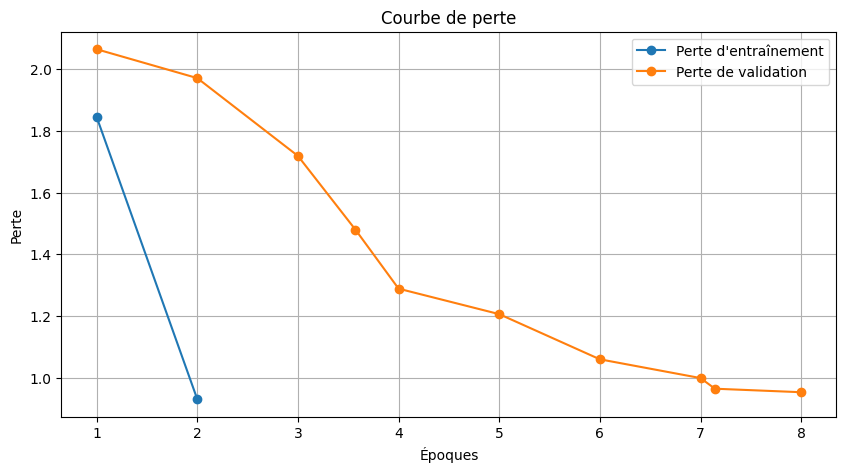

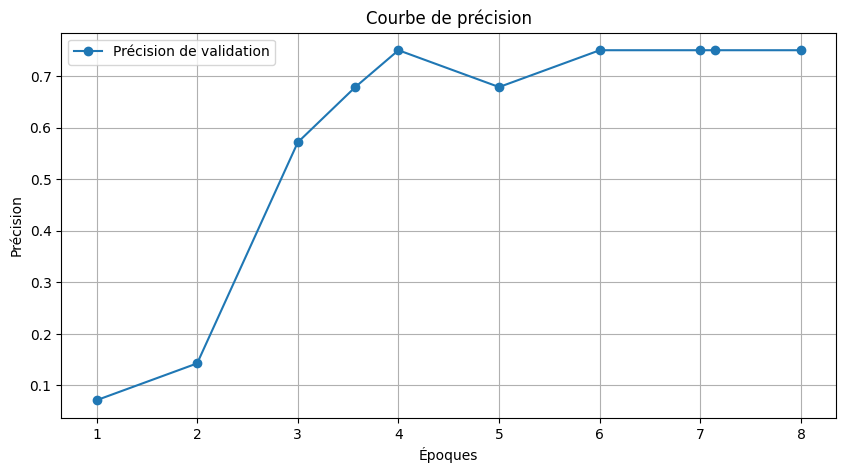

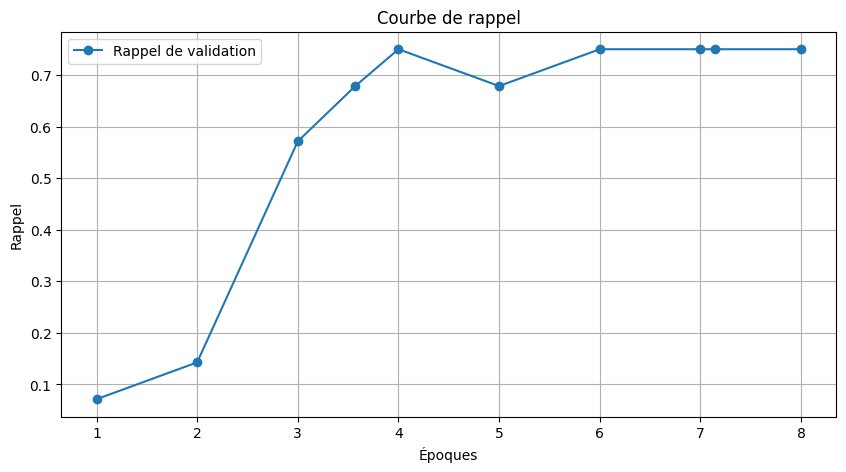

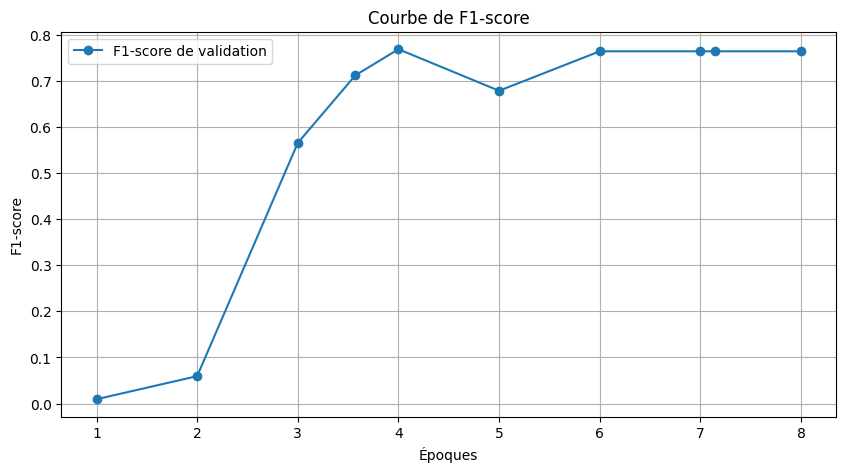

In [ ]:
# partie entraienement du modele distil bert

import pandas as pd
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, EarlyStoppingCallback
)
from sklearn.model_selection import train_test_split
from datasets import Dataset
from google.colab import drive
import evaluate  # Utilisez evaluate à la place de datasets.load_metric
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# Monter Google Drive
drive.mount('/content/drive')

# Charger les données
file_path = '/content/drive/MyDrive/projet_ia/releve_bancaire_nettoye_categoris_updated.csv'
data = pd.read_csv(file_path)

# Vérifier les premières lignes
print("Aperçu des données :")
print(data.head())

# Mapper les catégories en labels numériques
label_map = {label: i for i, label in enumerate(data['Categorie'].unique())}
data['label'] = data['Categorie'].map(label_map)

# Vérifier le mapping des catégories
print("\nMapping des catégories :")
print(label_map)

# Diviser les données en ensembles d'entraînement et de test
train_data, eval_data = train_test_split(data[['Description', 'label']], test_size=0.2, random_state=42)

# Convertir les ensembles en Dataset Hugging Face
train_dataset = Dataset.from_pandas(train_data)
eval_dataset = Dataset.from_pandas(eval_data)

# Charger le tokenizer et le modèle DistilBERT
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=len(label_map))

# Tokeniser les données
def tokenize(batch):
    return tokenizer(batch["Description"], padding=True, truncation=True)

train_dataset = train_dataset.map(tokenize, batched=True)
eval_dataset = eval_dataset.map(tokenize, batched=True)

# Ajouter les labels pour l'entraînement
train_dataset = train_dataset.map(lambda examples: {'labels': examples['label']})
eval_dataset = eval_dataset.map(lambda examples: {'labels': examples['label']})

# Supprimer les colonnes inutiles pour le modèle
train_dataset = train_dataset.remove_columns(['Description', 'label'])
eval_dataset = eval_dataset.remove_columns(['Description', 'label'])

# Définir une fonction pour calculer les métriques
metric = evaluate.load("accuracy")  # Charger la métrique de précision

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=1)  # Trouver l'indice du label prédit
    accuracy = metric.compute(predictions=predictions, references=labels)

    # Calculer le F1-score, la précision et le rappel
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "precision": precision,
        "recall": recall,
        "f1": f1
    }


# Configurer les arguments d'entraînement
training_args = TrainingArguments(
    output_dir="./results",                 # Où sauvegarder les résultats
    evaluation_strategy="epoch",           # Évaluer après chaque époque
    save_strategy="epoch",                 # Sauvegarder le modèle après chaque époque
    per_device_train_batch_size=8,         # Taille du batch pour l'entraînement
    per_device_eval_batch_size=8,          # Taille du batch pour l'évaluation
    num_train_epochs=10,                   # Nombre maximum d'époques
    learning_rate=5e-5,                    # Taux d'apprentissage
    weight_decay=0.01,                     # Décroissance du poids (weight decay)
    logging_dir="./logs",                  # Dossier pour les logs
    logging_steps=50,                      # Fréquence de journalisation
    load_best_model_at_end=True,           # Charger le meilleur modèle après l'entraînement
    metric_for_best_model="eval_loss",     # Basé sur la perte d'évaluation
    save_total_limit=2,                     # Garde seulement les 2 derniers checkpoints
    report_to="none"  # Désactive WandB
)

# Créer le Trainer
trainer = Trainer(
    model=model,                      # Modèle à entraîner
    args=training_args,               # Arguments d'entraînement
    train_dataset=train_dataset,      # Dataset d'entraînement
    eval_dataset=eval_dataset,        # Dataset d'évaluation
    tokenizer=tokenizer,              # Tokenizer pour les entrées
    compute_metrics=compute_metrics,  # Fonction pour calculer les métriques
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]  # Arrête après 2 époques sans amélioration
)

# Entraîner le modèle
trainer.train()

# Sauvegarder le modèle entraîné
model.save_pretrained('./trained_model')
tokenizer.save_pretrained('./trained_model')

# Vérifier la répartition des catégories dans les données d'entraînement
print("\nRépartition des catégories dans les données d'entraînement :")
print(train_data['label'].value_counts())

# Afficher les labels associés aux catégories
print("\nLabels associés aux catégories :")
print(data[['Categorie', 'label']].drop_duplicates())


# Tracer les courbes des métriques
def plot_training_metrics(log_history):
    epochs = []
    train_loss = []
    eval_loss = []
    eval_accuracy = []
    eval_precision = []
    eval_recall = []
    eval_f1 = []

    # Collecter les métriques des logs
    for log in log_history:
        if "epoch" in log:
            epochs.append(log["epoch"])
        if "loss" in log:
            train_loss.append(log["loss"])
        if "eval_loss" in log:
            eval_loss.append(log["eval_loss"])
        if "eval_accuracy" in log:
            eval_accuracy.append(log["eval_accuracy"])
        if "eval_precision" in log:
            eval_precision.append(log["eval_precision"])
        if "eval_recall" in log:
            eval_recall.append(log["eval_recall"])
        if "eval_f1" in log:
            eval_f1.append(log["eval_f1"])

    # Vérification des dimensions et ajout de valeurs par défaut si nécessaire
    while len(train_loss) < len(epochs):
        train_loss.append(None)
    while len(eval_loss) < len(epochs):
        eval_loss.append(None)
    while len(eval_accuracy) < len(epochs):
        eval_accuracy.append(None)
    while len(eval_precision) < len(epochs):
        eval_precision.append(None)
    while len(eval_recall) < len(epochs):
        eval_recall.append(None)
    while len(eval_f1) < len(epochs):
        eval_f1.append(None)

    # Courbe de perte
    if len(train_loss) == len(epochs):
        plt.figure(figsize=(10, 5))
        plt.plot(epochs, train_loss, label="Perte d'entraînement", marker="o")
        if len(eval_loss) == len(epochs):
            plt.plot(epochs, eval_loss, label="Perte de validation", marker="o")
        plt.title("Courbe de perte")
        plt.xlabel("Époques")
        plt.ylabel("Perte")
        plt.legend()
        plt.grid()
        plt.show()

    # Courbe de précision
    if len(eval_accuracy) == len(epochs):
        plt.figure(figsize=(10, 5))
        plt.plot(epochs, eval_accuracy, label="Précision de validation", marker="o")
        plt.title("Courbe de précision")
        plt.xlabel("Époques")
        plt.ylabel("Précision")
        plt.legend()
        plt.grid()
        plt.show()

    # Courbe de rappel
    if len(eval_recall) == len(epochs):
        plt.figure(figsize=(10, 5))
        plt.plot(epochs, eval_recall, label="Rappel de validation", marker="o")
        plt.title("Courbe de rappel")
        plt.xlabel("Époques")
        plt.ylabel("Rappel")
        plt.legend()
        plt.grid()
        plt.show()

    # Courbe de F1-score
    if len(eval_f1) == len(epochs):
        plt.figure(figsize=(10, 5))
        plt.plot(epochs, eval_f1, label="F1-score de validation", marker="o")
        plt.title("Courbe de F1-score")
        plt.xlabel("Époques")
        plt.ylabel("F1-score")
        plt.legend()
        plt.grid()
        plt.show()

# Tracer les courbes après l'entraînement
plot_training_metrics(trainer.state.log_history)



In [ ]:
#test sur exemple

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Charger le modèle et le tokenizer entraînés
model = AutoModelForSequenceClassification.from_pretrained('./trained_model')
tokenizer = AutoTokenizer.from_pretrained('./trained_model')

# Construire un mapping inverse des labels
inverse_label_map = {v: k for k, v in label_map.items()}

# Fonction de prédiction
def predict_category(description):
    inputs = tokenizer(description, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits, dim=1).item()
    return inverse_label_map.get(predicted_class, "Autres")  # Retourne "Autres" si le label est inconnu

# Exemples de descriptions à tester
exemples = [
    "CB FOOD",  # Alimentation
    "VIREMENT SALAIRE MENSUEL",  # Transactions financières (Entrées)
    " ESPACIL ",  # Logement
    " Navigo",  # Transport
    "navigo", #Abonnement
    "Bershka", # Achats
    "espacil", # Achats
    "CB BASIC FIT",  # Achats
]

# Tester les descriptions
for exemple in exemples:
    print(f"Description: {exemple} -> Catégorie prédite: {predict_category(exemple)}")


Description: CB FOOD -> Catégorie prédite: Alimentation
Description: VIREMENT SALAIRE MENSUEL -> Catégorie prédite: Transactions financières (Entrées)
Description:  ESPACIL  -> Catégorie prédite: Logement
Description:  Navigo -> Catégorie prédite: Transport
Description: navigo -> Catégorie prédite: Transport
Description: Bershka -> Catégorie prédite: Achats
Description: espacil -> Catégorie prédite: Logement
Description: CB BASIC FIT -> Catégorie prédite: Achats


In [ ]:
#nettoyage du pdf et passage en csv

import camelot
import pandas as pd
import os
from google.colab import drive

# Monter Google Drive
drive.mount("/content/drive", force_remount=True)

# Chemin vers le fichier PDF dans Google Drive
pdf_path = '/content/drive/MyDrive/projet_ia/releve_bakary/releve_bakary1.pdf'

# Dossier de destination pour les fichiers CSV nettoyés
destination_folder = '/content/drive/MyDrive/projet_ia/fonctionnel/'  # Dossier où enregistrer les fichiers CSV

# Créer le dossier de destination s'il n'existe pas déjà
os.makedirs(destination_folder, exist_ok=True)

# Fonction pour extraire les tableaux d'un PDF et nettoyer les données
def extract_and_clean_pdf(pdf_path, output_csv_path):
    # Utilisation de camelot pour extraire les tableaux
    tables = camelot.read_pdf(pdf_path, pages='all', strip_text='\n', flavor='stream')

    # Si aucun tableau n'est trouvé, informer l'utilisateur
    if len(tables) == 0:
        print(f"Aucun tableau trouvé dans le fichier PDF : {pdf_path}")
        return

    # Si plusieurs tableaux existent, les combiner
    all_tables = pd.DataFrame()
    for table in tables:
        df = table.df  # Extraire chaque tableau sous forme de DataFrame
        all_tables = pd.concat([all_tables, df], ignore_index=True)

    # Renommer les colonnes (en supposant qu'il y a 5 colonnes utiles)
    if all_tables.shape[1] > 5:  # Vérifie si une colonne superflue est présente
        all_tables = all_tables.iloc[:, :5]  # Garder uniquement les 5 premières colonnes

    all_tables = all_tables.rename(columns={all_tables.columns[0]: 'Date',
                                            all_tables.columns[1]: 'Description',
                                            all_tables.columns[2]: 'Valeur',
                                            all_tables.columns[3]: 'Débit',
                                            all_tables.columns[4]: 'Crédit'})

    # Traiter les lignes sans date valide et concaténer les libellés multi-lignes
    for i in range(1, len(all_tables)):
        if pd.isna(all_tables.iloc[i, 0]):  # Si la cellule de la colonne 'Date' est vide
            # Concaténer les lignes multi-lignes avec la ligne précédente (libellé, valeur, débit, et crédit)
            all_tables.iloc[i-1, 1] = str(all_tables.iloc[i-1, 1]) + " " + str(all_tables.iloc[i, 1])  # Concaténer les libellés multi-lignes
            all_tables.iloc[i-1, 2] = str(all_tables.iloc[i-1, 2]) + " " + str(all_tables.iloc[i, 2])  # Concaténer les valeurs (si applicable)
            all_tables.iloc[i-1, 3] = str(all_tables.iloc[i-1, 3]) + " " + str(all_tables.iloc[i, 3])  # Concaténer les débits
            all_tables.iloc[i-1, 4] = str(all_tables.iloc[i-1, 4]) + " " + str(all_tables.iloc[i, 4])  # Concaténer les crédits

    # Supprimer les lignes sans date (celles déjà fusionnées avec les lignes précédentes)
    df_cleaned = all_tables.dropna(subset=['Date'])

    # Filtrer les lignes où la première colonne (Date) correspond au format attendu 'DD.MM'
    df_cleaned = df_cleaned[df_cleaned['Date'].str.match(r'\d{2}\.\d{2}', na=False)]

    # Sauvegarder les données nettoyées dans un fichier CSV
    df_cleaned.to_csv(output_csv_path, sep=',', index=False)
    print(f"Fichier nettoyé sauvegardé à : {output_csv_path}")

# Chemin pour sauvegarder le fichier nettoyé dans le dossier de destination
output_cleaned_csv = os.path.join(destination_folder, 'releve_bakary_extrait1.csv')

# Appeler la fonction pour extraire et nettoyer le fichier PDF, puis sauvegarder dans un CSV
extract_and_clean_pdf(pdf_path, output_cleaned_csv)


Mounted at /content/drive
Fichier nettoyé sauvegardé à : /content/drive/MyDrive/projet_ia/fonctionnel/releve_bakary_extrait1.csv
